## Task 1: Preprocess and Explore the Data
# 1. Load, Clean, and Understand the Data:

In [5]:
import yfinance as yf

# Fetch data for Tesla, Vanguard Total Bond Market ETF, and S&P 500 ETF
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2024-10-31')


[*********************100%***********************]  3 of 3 completed


In [6]:
data = data.fillna(method='ffill')  # Forward fill missing data
# Alternatively, use interpolation
# data = data.interpolate()


C:\Users\MMM\AppData\Local\Temp\ipykernel_13548\1347171059.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill missing data


In [8]:
data.info()  # Check data types

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00+00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, BND)   2474 non-null   float64
 1   (Adj Close, SPY)   2474 non-null   float64
 2   (Adj Close, TSLA)  2474 non-null   float64
 3   (Close, BND)       2474 non-null   float64
 4   (Close, SPY)       2474 non-null   float64
 5   (Close, TSLA)      2474 non-null   float64
 6   (High, BND)        2474 non-null   float64
 7   (High, SPY)        2474 non-null   float64
 8   (High, TSLA)       2474 non-null   float64
 9   (Low, BND)         2474 non-null   float64
 10  (Low, SPY)         2474 non-null   float64
 11  (Low, TSLA)        2474 non-null   float64
 12  (Open, BND)        2474 non-null   float64
 13  (Open, SPY)        2474 non-null   float64
 14  (Open, TSLA)       2474 non-null   float64
 15  (Volume, BND)      2474 

In [9]:
data.describe()  # Basic statistics


Price     Adj Close                                  Close               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean      70.089252   310.253153   111.438965    80.316039   330.623634   
std        4.889918   111.250656   110.120450     5.097592   103.324179   
min       62.637566   157.328568     9.578000    68.040001   182.860001   
25%       66.314085   214.822357    17.066167    76.379997   242.130001   
50%       68.888958   275.812317    25.043000    81.410004   298.089996   
75%       73.807495   402.297539   216.865002    84.010002   416.212502   
max       79.812927   584.590027   409.970001    89.480003   584.590027   

Price                       High                                    Low  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     111.438965    80.431152   332.368856   113.895836    80.198464   
std      110.120450     5.082268   103.840765   112.643277     5.113232   
min        9.578000    68.379997   184.100006    10.331333    67.989998   
25%       17.066167    76.674999   243.380005    17.368167    76.265001   
50%       25.043000    81.519997   299.324997    25.279000    81.300003   
75%      216.865002    84.167500   418.242500   221.910004    83.937502   
max      409.970001    89.589996   586.119995   414.496674    89.440002   

Price                                    Open                            \
Ticker          SPY         TSLA          BND          SPY         TSLA   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     328.614426   108.869421    80.319968   330.570376   111.461872   
std      102.719137   107.541830     5.100419   103.311248   110.208156   
min      181.020004     9.403333    68.080002   182.339996     9.488000   
25%      240.692501    16.790167    76.502501   242.302498    17.058499   
50%      296.804993    24.462334    81.410004   298.095001    24.986667   
75%      413.687500   212.084999    84.047503   416.240005   217.264999   
max      582.580017   405.666656    89.550003   585.909973   411.470001   

Price         Volume                              
Ticker           BND           SPY          TSLA  
count   2.474000e+03  2.474000e+03  2.474000e+03  
mean    4.169014e+06  8.810268e+07  1.125745e+08  
std     2.778389e+06  4.491678e+07  7.449619e+07  
min     0.000000e+00  2.027000e+07  1.062000e+07  
25%     2.024900e+06  5.960170e+07  6.682590e+07  
50%     3.710900e+06  7.696935e+07  9.289395e+07  
75%     5.519825e+06  1.027178e+08  1.301899e+08  
max     3.193720e+07  5.072443e+08  9.140820e+08

# 2. Exploratory Data Analysis (EDA)

Visualize the Closing Price Over Time: Plot the closing price for each asset to understand long-term trends.

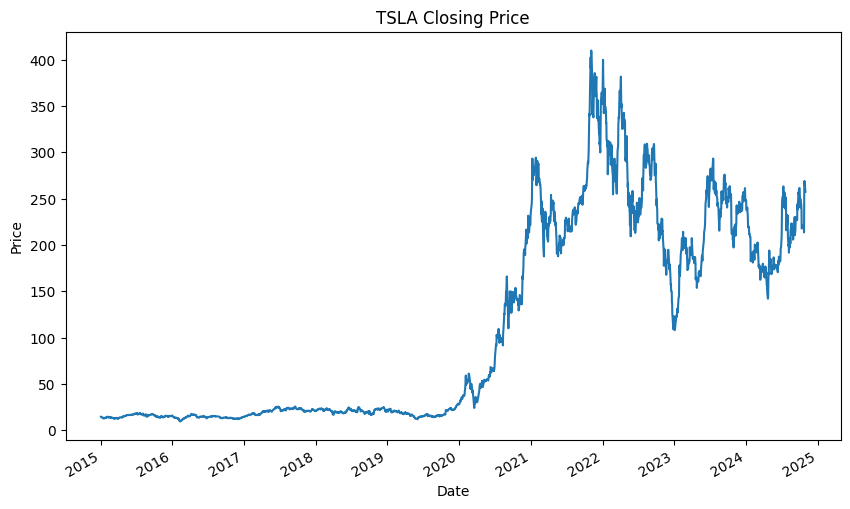

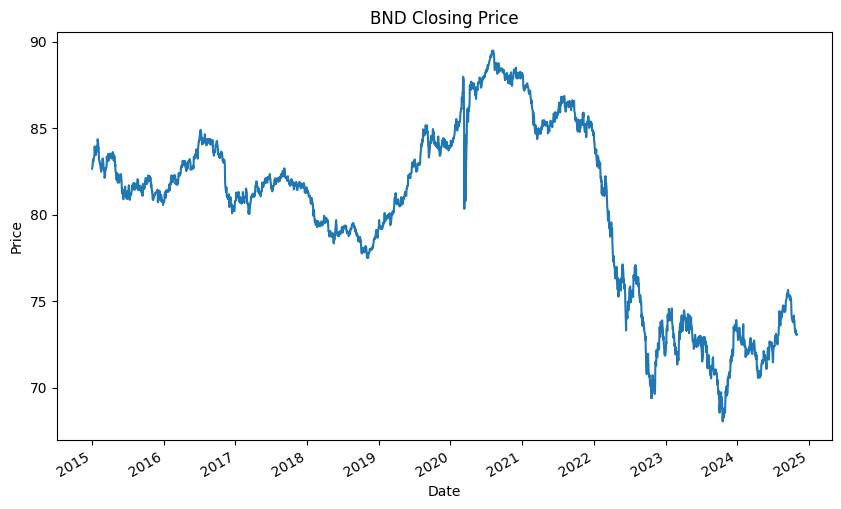

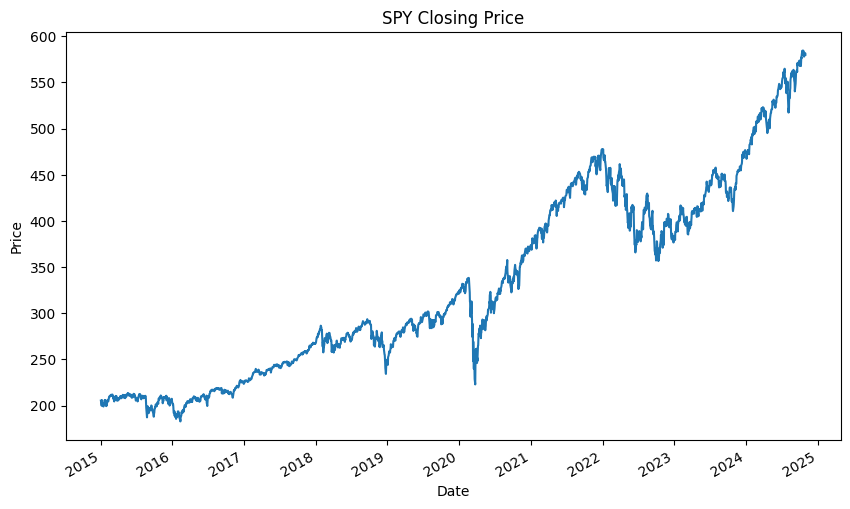

In [12]:
import matplotlib.pyplot as plt

data['Close']['TSLA'].plot(title='TSLA Closing Price', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

data['Close']['BND'].plot(title='BND Closing Price', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

data['Close']['SPY'].plot(title='SPY Closing Price', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


Calculate and Plot the Daily Percentage Change: This will help identify short-term volatility.

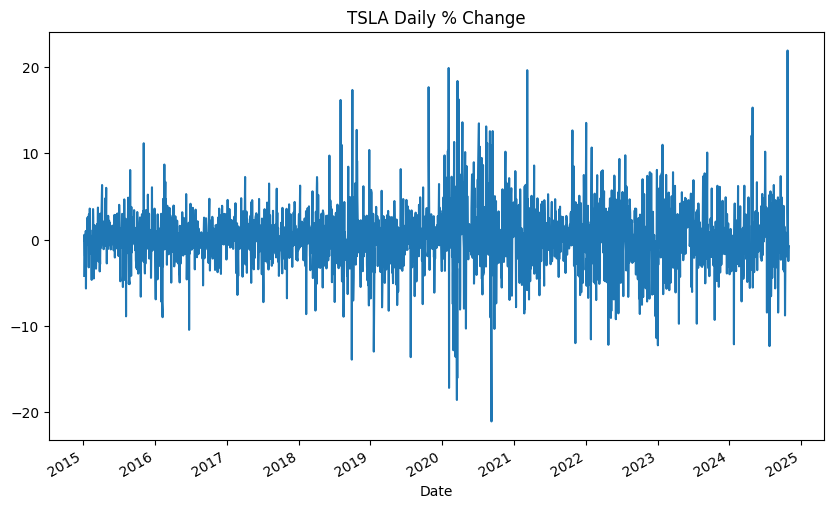

In [13]:
data['TSLA_daily_pct_change'] = data['Close']['TSLA'].pct_change() * 100
data['BND_daily_pct_change'] = data['Close']['BND'].pct_change() * 100
data['SPY_daily_pct_change'] = data['Close']['SPY'].pct_change() * 100

data['TSLA_daily_pct_change'].plot(figsize=(10, 6), title="TSLA Daily % Change")
plt.show()


Volatility Analysis: Calculate rolling means and standard deviations to measure volatility over a defined period, such as a 20-day window.



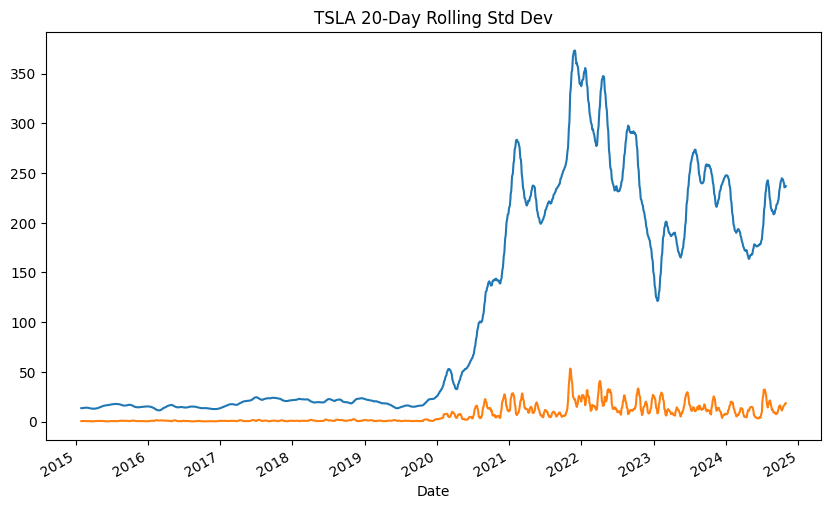

In [14]:
data['TSLA_rolling_mean'] = data['Close']['TSLA'].rolling(window=20).mean()
data['TSLA_rolling_std'] = data['Close']['TSLA'].rolling(window=20).std()

data['TSLA_rolling_mean'].plot(figsize=(10, 6), title="TSLA 20-Day Rolling Mean")
data['TSLA_rolling_std'].plot(figsize=(10, 6), title="TSLA 20-Day Rolling Std Dev")
plt.show()


# 3. Outlier Detection:

In [28]:
import pandas as pd
from scipy import stats

# Drop NaN values from the daily percentage change column
tsla_pct_change = data['TSLA_daily_pct_change'].dropna()

# Calculate Z-scores after dropping NaN
z_scores = stats.zscore(tsla_pct_change)

# Identify outliers using Z-scores
outliers = tsla_pct_change.index[abs(z_scores) > 3]  # Z-score > 3 considered outliers
print(f'Outliers found on dates: {outliers}')



Outliers found on dates: DatetimeIndex(['2015-11-04 00:00:00+00:00', '2018-08-02 00:00:00+00:00',
               '2018-08-07 00:00:00+00:00', '2018-09-28 00:00:00+00:00',
               '2018-10-01 00:00:00+00:00', '2018-10-23 00:00:00+00:00',
               '2019-01-18 00:00:00+00:00', '2019-07-25 00:00:00+00:00',
               '2019-10-24 00:00:00+00:00', '2020-02-03 00:00:00+00:00',
               '2020-02-04 00:00:00+00:00', '2020-02-05 00:00:00+00:00',
               '2020-02-27 00:00:00+00:00', '2020-03-02 00:00:00+00:00',
               '2020-03-09 00:00:00+00:00', '2020-03-12 00:00:00+00:00',
               '2020-03-16 00:00:00+00:00', '2020-03-18 00:00:00+00:00',
               '2020-03-19 00:00:00+00:00', '2020-03-24 00:00:00+00:00',
               '2020-04-13 00:00:00+00:00', '2020-07-06 00:00:00+00:00',
               '2020-08-12 00:00:00+00:00', '2020-08-17 00:00:00+00:00',
               '2020-08-31 00:00:00+00:00', '2020-09-08 00:00:00+00:00',
               '2020-09-09

# 4. Seasonality and Trend Decomposition:

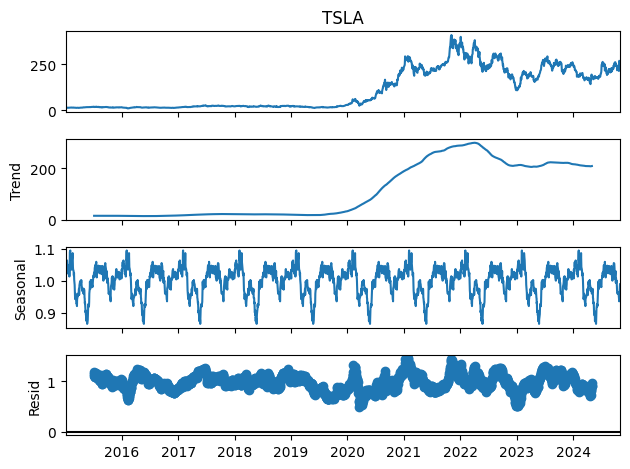

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose TSLA closing price
result = seasonal_decompose(data['Close']['TSLA'].dropna(), model='multiplicative', period=252)  # 252 trading days in a year
result.plot()
plt.show()


# 5. Risk and Return Assessment:

Value at Risk (VaR): Calculate VaR using historical simulation or a parametric method like a normal distribution approach.

In [32]:
VaR_95 = data['TSLA_daily_pct_change'].quantile(0.05)  # 95% Confidence level
print(f"Value at Risk (VaR) at 95% confidence: {VaR_95}")


Value at Risk (VaR) at 95% confidence: -5.125703646165556


Sharpe Ratio: Evaluate the risk-adjusted return of the asset. You can compute it using the risk-free rate (usually the return of treasury bills).

In [33]:
risk_free_rate = 0.01  # Assume 1% risk-free rate
mean_daily_return = data['TSLA_daily_pct_change'].mean()
std_daily_return = data['TSLA_daily_pct_change'].std()

sharpe_ratio = (mean_daily_return - risk_free_rate) / std_daily_return
print(f"Sharpe Ratio: {sharpe_ratio}")


Sharpe Ratio: 0.04745659645530195
